In [1]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('dst_values.csv')

data = df.values.astype('float32')

n_hours = data.shape[1]
print(n_hours)
n_days = data.shape[0]
print(n_days)

min_val = np.min(data)
max_val = np.max(data)
data = (data - min_val) / (max_val - min_val) * 2 - 1

X = data[:-1, :]
y = data[1:, :]  

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(720, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(n_hours))

model.compile(loss='mae', optimizer='adam')

history = model.fit(X_train, y_train, epochs=720, batch_size=72, verbose=2, validation_data=(X_test, y_test))

last_day = np.reshape(data[-1, :], (1, 1, n_hours))
predicted_dst = model.predict(last_day)


predicted_dst_denormed = (predicted_dst + 1) / 2 * (max_val - min_val) + min_val


24
31
Epoch 1/720
1/1 - 4s - loss: 0.3760 - val_loss: 0.3602 - 4s/epoch - 4s/step
Epoch 2/720
1/1 - 0s - loss: 0.3526 - val_loss: 0.3353 - 86ms/epoch - 86ms/step
Epoch 3/720
1/1 - 0s - loss: 0.3287 - val_loss: 0.3093 - 78ms/epoch - 78ms/step
Epoch 4/720
1/1 - 0s - loss: 0.3037 - val_loss: 0.2816 - 76ms/epoch - 76ms/step
Epoch 5/720
1/1 - 0s - loss: 0.2771 - val_loss: 0.2516 - 81ms/epoch - 81ms/step
Epoch 6/720
1/1 - 0s - loss: 0.2484 - val_loss: 0.2190 - 78ms/epoch - 78ms/step
Epoch 7/720
1/1 - 0s - loss: 0.2171 - val_loss: 0.1831 - 81ms/epoch - 81ms/step
Epoch 8/720
1/1 - 0s - loss: 0.1830 - val_loss: 0.1438 - 82ms/epoch - 82ms/step
Epoch 9/720
1/1 - 0s - loss: 0.1465 - val_loss: 0.1029 - 81ms/epoch - 81ms/step
Epoch 10/720
1/1 - 0s - loss: 0.1082 - val_loss: 0.0660 - 81ms/epoch - 81ms/step
Epoch 11/720
1/1 - 0s - loss: 0.0724 - val_loss: 0.0441 - 77ms/epoch - 77ms/step
Epoch 12/720
1/1 - 0s - loss: 0.0547 - val_loss: 0.0553 - 79ms/epoch - 79ms/step
Epoch 13/720
1/1 - 0s - loss: 0.064

1/1 - 0s - loss: 0.0364 - val_loss: 0.0255 - 165ms/epoch - 165ms/step
Epoch 103/720
1/1 - 0s - loss: 0.0363 - val_loss: 0.0254 - 203ms/epoch - 203ms/step
Epoch 104/720
1/1 - 0s - loss: 0.0362 - val_loss: 0.0253 - 133ms/epoch - 133ms/step
Epoch 105/720
1/1 - 0s - loss: 0.0362 - val_loss: 0.0254 - 181ms/epoch - 181ms/step
Epoch 106/720
1/1 - 0s - loss: 0.0361 - val_loss: 0.0253 - 157ms/epoch - 157ms/step
Epoch 107/720
1/1 - 0s - loss: 0.0360 - val_loss: 0.0253 - 134ms/epoch - 134ms/step
Epoch 108/720
1/1 - 0s - loss: 0.0359 - val_loss: 0.0252 - 144ms/epoch - 144ms/step
Epoch 109/720
1/1 - 0s - loss: 0.0358 - val_loss: 0.0251 - 142ms/epoch - 142ms/step
Epoch 110/720
1/1 - 0s - loss: 0.0357 - val_loss: 0.0251 - 133ms/epoch - 133ms/step
Epoch 111/720
1/1 - 0s - loss: 0.0356 - val_loss: 0.0251 - 127ms/epoch - 127ms/step
Epoch 112/720
1/1 - 0s - loss: 0.0356 - val_loss: 0.0251 - 99ms/epoch - 99ms/step
Epoch 113/720
1/1 - 0s - loss: 0.0355 - val_loss: 0.0250 - 57ms/epoch - 57ms/step
Epoch 114/

Epoch 202/720
1/1 - 0s - loss: 0.0301 - val_loss: 0.0222 - 72ms/epoch - 72ms/step
Epoch 203/720
1/1 - 0s - loss: 0.0301 - val_loss: 0.0216 - 71ms/epoch - 71ms/step
Epoch 204/720
1/1 - 0s - loss: 0.0301 - val_loss: 0.0214 - 76ms/epoch - 76ms/step
Epoch 205/720
1/1 - 0s - loss: 0.0300 - val_loss: 0.0220 - 92ms/epoch - 92ms/step
Epoch 206/720
1/1 - 0s - loss: 0.0300 - val_loss: 0.0217 - 93ms/epoch - 93ms/step
Epoch 207/720
1/1 - 0s - loss: 0.0299 - val_loss: 0.0218 - 84ms/epoch - 84ms/step
Epoch 208/720
1/1 - 0s - loss: 0.0299 - val_loss: 0.0221 - 78ms/epoch - 78ms/step
Epoch 209/720
1/1 - 0s - loss: 0.0298 - val_loss: 0.0216 - 97ms/epoch - 97ms/step
Epoch 210/720
1/1 - 0s - loss: 0.0298 - val_loss: 0.0218 - 97ms/epoch - 97ms/step
Epoch 211/720
1/1 - 0s - loss: 0.0298 - val_loss: 0.0222 - 98ms/epoch - 98ms/step
Epoch 212/720
1/1 - 0s - loss: 0.0297 - val_loss: 0.0215 - 88ms/epoch - 88ms/step
Epoch 213/720
1/1 - 0s - loss: 0.0296 - val_loss: 0.0214 - 88ms/epoch - 88ms/step
Epoch 214/720
1/

Epoch 302/720
1/1 - 0s - loss: 0.0277 - val_loss: 0.0228 - 63ms/epoch - 63ms/step
Epoch 303/720
1/1 - 0s - loss: 0.0274 - val_loss: 0.0241 - 65ms/epoch - 65ms/step
Epoch 304/720
1/1 - 0s - loss: 0.0276 - val_loss: 0.0235 - 60ms/epoch - 60ms/step
Epoch 305/720
1/1 - 0s - loss: 0.0275 - val_loss: 0.0234 - 59ms/epoch - 59ms/step
Epoch 306/720
1/1 - 0s - loss: 0.0273 - val_loss: 0.0239 - 77ms/epoch - 77ms/step
Epoch 307/720
1/1 - 0s - loss: 0.0273 - val_loss: 0.0230 - 138ms/epoch - 138ms/step
Epoch 308/720
1/1 - 0s - loss: 0.0274 - val_loss: 0.0234 - 134ms/epoch - 134ms/step
Epoch 309/720
1/1 - 0s - loss: 0.0273 - val_loss: 0.0241 - 152ms/epoch - 152ms/step
Epoch 310/720
1/1 - 0s - loss: 0.0274 - val_loss: 0.0230 - 169ms/epoch - 169ms/step
Epoch 311/720
1/1 - 0s - loss: 0.0273 - val_loss: 0.0233 - 130ms/epoch - 130ms/step
Epoch 312/720
1/1 - 0s - loss: 0.0271 - val_loss: 0.0241 - 124ms/epoch - 124ms/step
Epoch 313/720
1/1 - 0s - loss: 0.0273 - val_loss: 0.0227 - 134ms/epoch - 134ms/step
Ep

Epoch 402/720
1/1 - 0s - loss: 0.0259 - val_loss: 0.0245 - 80ms/epoch - 80ms/step
Epoch 403/720
1/1 - 0s - loss: 0.0256 - val_loss: 0.0246 - 86ms/epoch - 86ms/step
Epoch 404/720
1/1 - 0s - loss: 0.0257 - val_loss: 0.0247 - 95ms/epoch - 95ms/step
Epoch 405/720
1/1 - 0s - loss: 0.0255 - val_loss: 0.0241 - 83ms/epoch - 83ms/step
Epoch 406/720
1/1 - 0s - loss: 0.0256 - val_loss: 0.0241 - 87ms/epoch - 87ms/step
Epoch 407/720
1/1 - 0s - loss: 0.0255 - val_loss: 0.0248 - 86ms/epoch - 86ms/step
Epoch 408/720
1/1 - 0s - loss: 0.0255 - val_loss: 0.0243 - 83ms/epoch - 83ms/step
Epoch 409/720
1/1 - 0s - loss: 0.0256 - val_loss: 0.0249 - 89ms/epoch - 89ms/step
Epoch 410/720
1/1 - 0s - loss: 0.0257 - val_loss: 0.0238 - 81ms/epoch - 81ms/step
Epoch 411/720
1/1 - 0s - loss: 0.0257 - val_loss: 0.0256 - 69ms/epoch - 69ms/step
Epoch 412/720
1/1 - 0s - loss: 0.0256 - val_loss: 0.0245 - 76ms/epoch - 76ms/step
Epoch 413/720
1/1 - 0s - loss: 0.0255 - val_loss: 0.0234 - 73ms/epoch - 73ms/step
Epoch 414/720
1/

Epoch 502/720
1/1 - 0s - loss: 0.0244 - val_loss: 0.0257 - 75ms/epoch - 75ms/step
Epoch 503/720
1/1 - 0s - loss: 0.0254 - val_loss: 0.0295 - 76ms/epoch - 76ms/step
Epoch 504/720
1/1 - 0s - loss: 0.0260 - val_loss: 0.0258 - 79ms/epoch - 79ms/step
Epoch 505/720
1/1 - 0s - loss: 0.0243 - val_loss: 0.0249 - 77ms/epoch - 77ms/step
Epoch 506/720
1/1 - 0s - loss: 0.0259 - val_loss: 0.0301 - 68ms/epoch - 68ms/step
Epoch 507/720
1/1 - 0s - loss: 0.0261 - val_loss: 0.0281 - 75ms/epoch - 75ms/step
Epoch 508/720
1/1 - 0s - loss: 0.0249 - val_loss: 0.0255 - 68ms/epoch - 68ms/step
Epoch 509/720
1/1 - 0s - loss: 0.0263 - val_loss: 0.0270 - 72ms/epoch - 72ms/step
Epoch 510/720
1/1 - 0s - loss: 0.0245 - val_loss: 0.0275 - 77ms/epoch - 77ms/step
Epoch 511/720
1/1 - 0s - loss: 0.0247 - val_loss: 0.0253 - 71ms/epoch - 71ms/step
Epoch 512/720
1/1 - 0s - loss: 0.0257 - val_loss: 0.0275 - 66ms/epoch - 66ms/step
Epoch 513/720
1/1 - 0s - loss: 0.0242 - val_loss: 0.0275 - 52ms/epoch - 52ms/step
Epoch 514/720
1/

Epoch 602/720
1/1 - 0s - loss: 0.0234 - val_loss: 0.0282 - 64ms/epoch - 64ms/step
Epoch 603/720
1/1 - 0s - loss: 0.0233 - val_loss: 0.0288 - 74ms/epoch - 74ms/step
Epoch 604/720
1/1 - 0s - loss: 0.0235 - val_loss: 0.0282 - 71ms/epoch - 71ms/step
Epoch 605/720
1/1 - 0s - loss: 0.0234 - val_loss: 0.0302 - 70ms/epoch - 70ms/step
Epoch 606/720
1/1 - 0s - loss: 0.0236 - val_loss: 0.0291 - 69ms/epoch - 69ms/step
Epoch 607/720
1/1 - 0s - loss: 0.0236 - val_loss: 0.0293 - 67ms/epoch - 67ms/step
Epoch 608/720
1/1 - 0s - loss: 0.0234 - val_loss: 0.0285 - 64ms/epoch - 64ms/step
Epoch 609/720
1/1 - 0s - loss: 0.0234 - val_loss: 0.0293 - 72ms/epoch - 72ms/step
Epoch 610/720
1/1 - 0s - loss: 0.0233 - val_loss: 0.0286 - 70ms/epoch - 70ms/step
Epoch 611/720
1/1 - 0s - loss: 0.0237 - val_loss: 0.0300 - 65ms/epoch - 65ms/step
Epoch 612/720
1/1 - 0s - loss: 0.0234 - val_loss: 0.0297 - 63ms/epoch - 63ms/step
Epoch 613/720
1/1 - 0s - loss: 0.0233 - val_loss: 0.0282 - 63ms/epoch - 63ms/step
Epoch 614/720
1/

Epoch 702/720
1/1 - 0s - loss: 0.0233 - val_loss: 0.0322 - 71ms/epoch - 71ms/step
Epoch 703/720
1/1 - 0s - loss: 0.0228 - val_loss: 0.0319 - 75ms/epoch - 75ms/step
Epoch 704/720
1/1 - 0s - loss: 0.0230 - val_loss: 0.0319 - 73ms/epoch - 73ms/step
Epoch 705/720
1/1 - 0s - loss: 0.0226 - val_loss: 0.0318 - 71ms/epoch - 71ms/step
Epoch 706/720
1/1 - 0s - loss: 0.0224 - val_loss: 0.0318 - 71ms/epoch - 71ms/step
Epoch 707/720
1/1 - 0s - loss: 0.0229 - val_loss: 0.0326 - 70ms/epoch - 70ms/step
Epoch 708/720
1/1 - 0s - loss: 0.0229 - val_loss: 0.0322 - 68ms/epoch - 68ms/step
Epoch 709/720
1/1 - 0s - loss: 0.0228 - val_loss: 0.0320 - 71ms/epoch - 71ms/step
Epoch 710/720
1/1 - 0s - loss: 0.0224 - val_loss: 0.0325 - 78ms/epoch - 78ms/step
Epoch 711/720
1/1 - 0s - loss: 0.0228 - val_loss: 0.0314 - 74ms/epoch - 74ms/step
Epoch 712/720
1/1 - 0s - loss: 0.0229 - val_loss: 0.0330 - 67ms/epoch - 67ms/step
Epoch 713/720
1/1 - 0s - loss: 0.0232 - val_loss: 0.0322 - 72ms/epoch - 72ms/step
Epoch 714/720
1/

In [2]:
print('predicted_dst\n')
print(predicted_dst)
print('predicted_dst_denormed\n')
print(predicted_dst_denormed)

if np.any(predicted_dst_denormed < -75) or np.any(predicted_dst_denormed > 75):
    print('Alarm! Predicted DST value exceeds the range [-75, 75]!')
    plt.plot(predicted_dst_denormed,label='denormed pred dst')
    plt.plot(predicted_dst,label='pred dst')
    plt.legend()
    plt.show()

predicted_dst

[[0.37100816 0.36304927 0.3474594  0.34952998 0.3643841  0.36089504
  0.35280052 0.35232207 0.3551635  0.35296014 0.35939702 0.3623329
  0.37608224 0.37192354 0.36037463 0.35302645 0.35477334 0.36574
  0.36098105 0.3640142  0.3687111  0.3808131  0.3816882  0.37993333]]
predicted_dst_denormed

[[ -7.0021973  -9.748016  -15.126495  -14.41217    -9.287445  -10.491211
  -13.283844  -13.448883  -12.468567  -13.22876   -11.008026   -9.995148
   -5.251648   -6.686371  -10.670746  -13.205902  -12.60321    -8.819672
  -10.461548   -9.415131   -7.7946777  -3.6194763  -3.317566   -3.9230042]]


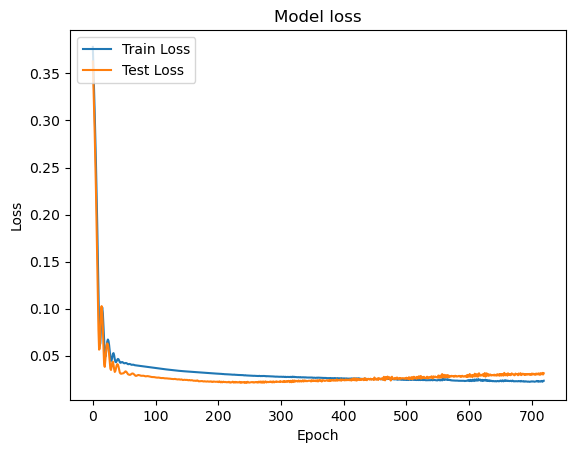

In [3]:
#plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
# plt.plot(history.history['predicted_dst'], label='predicted_dst')
# plt.plot(history.history['predicted_dst_denormed'], label='predicted_dst_denormed')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

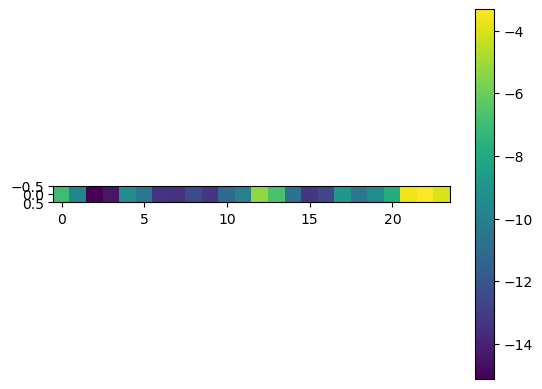

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(predicted_dst, interpolation='nearest', cmap='viridis')
plt.imshow(predicted_dst_denormed, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.show()